In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
import torch
import torch.nn as nn
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from tensorflow.keras import models
from tensorflow.keras import layers
from sklearn.metrics import mean_squared_error
from data_functions import *

In [2]:
BEEF = pd.read_csv('./Data/Brazil - Minerva SA_Brazil (BEEF3).csv')

In [3]:
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,"Mar 31, 2021",10.2,10.35,10.4,10.12,7.77M,-1.54%
1,"Mar 30, 2021",10.36,10.41,10.62,10.3,9.93M,-1.05%
2,"Mar 29, 2021",10.47,9.85,10.5,9.81,22.04M,6.51%
3,"Mar 26, 2021",9.83,9.8,9.94,9.7,5.11M,0.31%
4,"Mar 25, 2021",9.8,10.01,10.01,9.66,8.88M,-1.51%
...,...,...,...,...,...,...,...
305,"Jan 07, 2020",13.48,13.03,13.48,13.03,8.20M,4.58%
306,"Jan 06, 2020",12.89,12.9,12.91,12.57,4.17M,-0.08%
307,"Jan 03, 2020",12.9,12.45,12.93,12.27,4.88M,2.63%
308,"Jan 02, 2020",12.57,12.88,12.99,12.57,5.78M,-2.10%


In [4]:
## drop last row because it doesn't contain relevant information

BEEF.drop(309, inplace=True)

In [5]:
## change date column to datetime

BEEF['Date'] = pd.to_datetime(BEEF['Date'], format='%b %d, %Y')

In [6]:
## change price columns to integer

BEEF['Price'] = pd.to_numeric(BEEF['Price'])
BEEF['Open'] = pd.to_numeric(BEEF['Open'])
BEEF['High'] = pd.to_numeric(BEEF['High'])
BEEF['Low'] = pd.to_numeric(BEEF['Low'])

In [7]:
BEEF.sort_values(['Date'], ascending=True, ignore_index=True, inplace=True)
BEEF

,Date,Price,Open,High,Low,Vol.,Change %
0,2020-01-02,12.57,12.88,12.99,12.57,5.78M,-2.10%
1,2020-01-03,12.90,12.45,12.93,12.27,4.88M,2.63%
2,2020-01-06,12.89,12.90,12.91,12.57,4.17M,-0.08%
3,2020-01-07,13.48,13.03,13.48,13.03,8.20M,4.58%
4,2020-01-08,13.63,13.50,13.68,13.18,6.18M,1.11%
...,...,...,...,...,...,...,...
304,2021-03-25,9.80,10.01,10.01,9.66,8.88M,-1.51%
305,2021-03-26,9.83,9.80,9.94,9.70,5.11M,0.31%
306,2021-03-29,10.47,9.85,10.50,9.81,22.04M,6.51%
307,2021-03-30,10.36,10.41,10.62,10.30,9.93M,-1.05%


In [8]:
## find rows for 2021 data

BEEF.loc[BEEF['Date'] > '2020-12-31']

,Date,Price,Open,High,Low,Vol.,Change %
249,2021-01-04,10.04,10.23,10.32,10.03,6.12M,-1.38%
250,2021-01-05,9.84,10.07,10.10,9.77,13.66M,-1.99%
251,2021-01-06,9.69,9.85,9.86,9.69,8.36M,-1.52%
252,2021-01-07,9.65,9.75,9.81,9.62,7.77M,-0.41%
253,2021-01-08,9.73,9.67,9.85,9.66,7.46M,0.83%
254,2021-01-11,9.61,9.70,9.80,9.60,10.90M,-1.23%
255,2021-01-12,9.99,9.68,10.03,9.62,14.24M,3.95%
256,2021-01-13,9.80,10.05,10.06,9.68,11.38M,-1.90%
257,2021-01-14,9.82,9.86,9.96,9.73,7.00M,0.20%
258,2021-01-15,9.72,9.80,9.82,9.69,6.36M,-1.02%


In [9]:
## split training data and testing data, testing data will be the year of 2021

training_data = BEEF[['Date', 'Price']][:249]
testing_data = BEEF[['Date', 'Price']][249:]

In [12]:
scaler = MinMaxScaler()
scaled_data = scaler.fit_transform(BEEF[['Price']])
scaled_train_data = scaled_data[:240]

# Daily

In [18]:
class LSTM(nn.Module):
    def __init__(self, input_dim, hidden_dim, num_layers, output_dim):
        super(LSTM, self).__init__()
        self.hidden_dim = hidden_dim
        self.num_layers = num_layers
        
        self.lstm = nn.LSTM(input_dim, hidden_dim, num_layers, batch_first=True)
        self.fc = nn.Linear(hidden_dim, output_dim)   
        
    def forward(self, x):
        h0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        c0 = torch.zeros(self.num_layers, x.size(0), self.hidden_dim).requires_grad_()
        out, (hn, cn) = self.lstm(x, (h0.detach(), c0.detach()))
        out = self.fc(out[:, -1, :]) 
        return out

In [26]:
X_train, y_train = get_train_data(scaled_train_data, 10)
X_test, y_test = get_test_data(BEEF, testing_data, scaler, 10)

In [27]:
X_train = torch.from_numpy(X_train).type(torch.Tensor)
X_test = torch.from_numpy(X_test).type(torch.Tensor)
y_train = torch.from_numpy(y_train).type(torch.Tensor)
y_test = torch.from_numpy(y_test).type(torch.Tensor)

In [28]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=1, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)
print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=1, bias=True)
)


In [29]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train)    
    
    loss = criterion(y_train_pred, y_train)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.2506755590438843
Epoch  1 MSE:  0.10219883918762207
Epoch  2 MSE:  0.04899691417813301
Epoch  3 MSE:  0.04999252036213875
Epoch  4 MSE:  0.0395200215280056
Epoch  5 MSE:  0.04724978655576706
Epoch  6 MSE:  0.04506734013557434
Epoch  7 MSE:  0.035789355635643005
Epoch  8 MSE:  0.03264203667640686
Epoch  9 MSE:  0.038160741329193115
Epoch  10 MSE:  0.02881905995309353
Epoch  11 MSE:  0.02452170103788376
Epoch  12 MSE:  0.026327677071094513
Epoch  13 MSE:  0.020918572321534157
Epoch  14 MSE:  0.0132669722661376
Epoch  15 MSE:  0.022071784362196922
Epoch  16 MSE:  0.010337512008845806
Epoch  17 MSE:  0.01968803070485592
Epoch  18 MSE:  0.013115285895764828
Epoch  19 MSE:  0.012221862562000751
Epoch  20 MSE:  0.014898150227963924
Epoch  21 MSE:  0.008878149092197418
Epoch  22 MSE:  0.011895145289599895
Epoch  23 MSE:  0.012312961742281914
Epoch  24 MSE:  0.009282253682613373
Epoch  25 MSE:  0.009301857091486454
Epoch  26 MSE:  0.011278251186013222
Epoch  27 MSE:  0.00965167

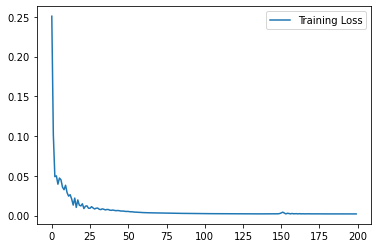

In [30]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [31]:
y_train_pred = model(X_train)
y_test_pred = model(X_test)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 0.40 RMSE
Test Score: 0.24 RMSE


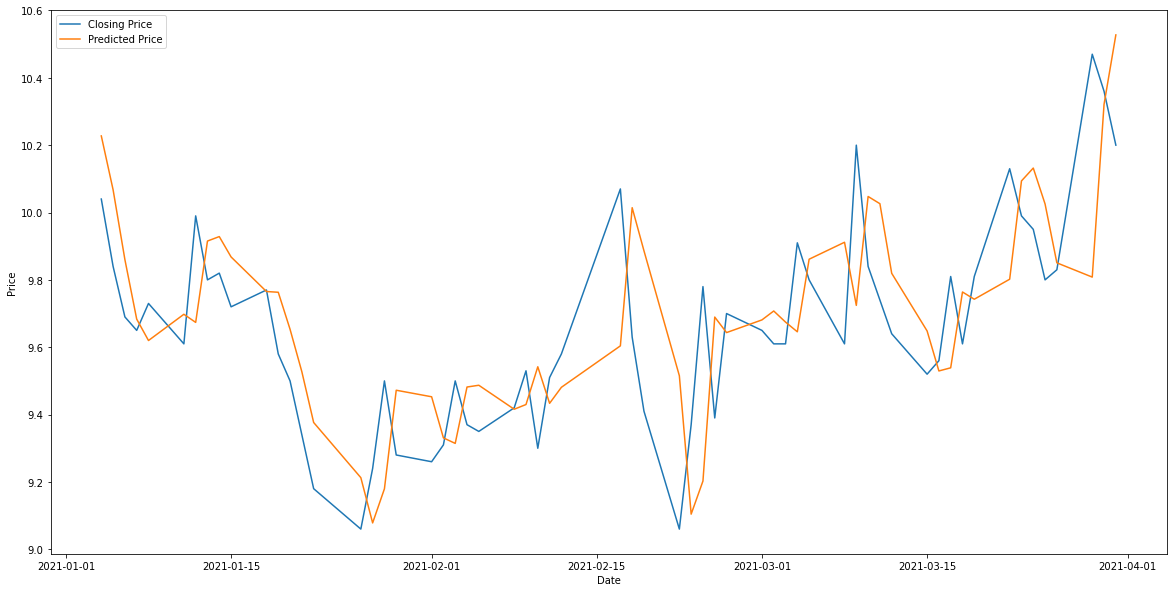

In [32]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test, label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred, label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Weekly

In [35]:
X_train_w, y_train_w = get_weekly_train_data(scaled_train_data, 15)
X_test_w, y_test_w = get_weekly_test_data(BEEF, testing_data, scaler, 15)

In [36]:
X_train_w = torch.from_numpy(X_train_w).type(torch.Tensor)
X_test_w = torch.from_numpy(X_test_w).type(torch.Tensor)
y_train_w = torch.from_numpy(y_train_w).type(torch.Tensor)
y_test_w = torch.from_numpy(y_test_w).type(torch.Tensor)

In [37]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=5, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=5, bias=True)
)


In [38]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_w)    
    
    loss = criterion(y_train_pred, y_train_w)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.41172653436660767
Epoch  1 MSE:  0.30232879519462585
Epoch  2 MSE:  0.1588655412197113
Epoch  3 MSE:  0.13671870529651642
Epoch  4 MSE:  0.05575832724571228
Epoch  5 MSE:  0.04680692031979561
Epoch  6 MSE:  0.06340312212705612
Epoch  7 MSE:  0.06509675830602646
Epoch  8 MSE:  0.06030529737472534
Epoch  9 MSE:  0.05486707016825676
Epoch  10 MSE:  0.04916105419397354
Epoch  11 MSE:  0.043821465224027634
Epoch  12 MSE:  0.0401674285531044
Epoch  13 MSE:  0.03851247578859329
Epoch  14 MSE:  0.03796958923339844
Epoch  15 MSE:  0.03741186484694481
Epoch  16 MSE:  0.03626986965537071
Epoch  17 MSE:  0.034451115876436234
Epoch  18 MSE:  0.03174648806452751
Epoch  19 MSE:  0.02775328978896141
Epoch  20 MSE:  0.02286720648407936
Epoch  21 MSE:  0.019386474043130875
Epoch  22 MSE:  0.018360421061515808
Epoch  23 MSE:  0.02282578870654106
Epoch  24 MSE:  0.019067877903580666
Epoch  25 MSE:  0.017680002376437187
Epoch  26 MSE:  0.015372301451861858
Epoch  27 MSE:  0.015738714486360

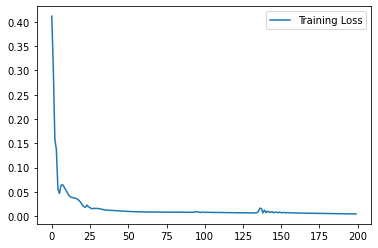

In [39]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [40]:
y_train_pred = model(X_train_w)
y_test_pred = model(X_test_w)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_w.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_w.reshape(12, 5).detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_w[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_w[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.27 RMSE
Test Score: 9.43 RMSE


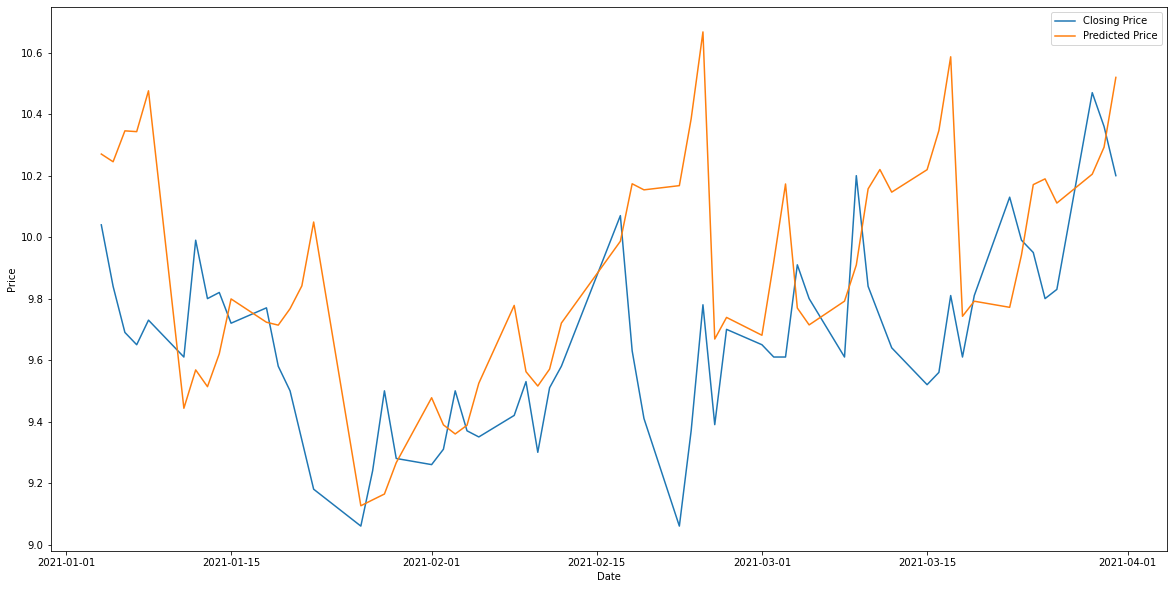

In [41]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

# Monthly

In [43]:
X_train_m, y_train_m = get_monthly_train_data(scaled_train_data, 40)
X_test_m, y_test_m = get_monthly_test_data(BEEF, testing_data, scaler, 40)

In [44]:
X_train_m = torch.from_numpy(X_train_m).type(torch.Tensor)
X_test_m = torch.from_numpy(X_test_m).type(torch.Tensor)
y_train_m = torch.from_numpy(y_train_m).type(torch.Tensor)
y_test_m = torch.from_numpy(y_test_m).type(torch.Tensor)

In [45]:
model = LSTM(input_dim=1, hidden_dim=50, output_dim=20, num_layers=2)
criterion = torch.nn.MSELoss(reduction='mean')
optimiser = torch.optim.Adam(model.parameters(), lr=0.01)

print(model)

LSTM(
  (lstm): LSTM(1, 50, num_layers=2, batch_first=True)
  (fc): Linear(in_features=50, out_features=20, bias=True)
)


In [46]:
num_epochs = 200

hist = np.zeros(num_epochs)
lstm = []
for t in range(num_epochs):
    y_train_pred = model(X_train_m)    
    
    loss = criterion(y_train_pred, y_train_m)
    print("Epoch ", t, "MSE: ", loss.item())
    hist[t] = loss.item()    
    
    optimiser.zero_grad()
    loss.backward()
    optimiser.step()

Epoch  0 MSE:  0.3814058303833008
Epoch  1 MSE:  0.2956027686595917
Epoch  2 MSE:  0.16465623676776886
Epoch  3 MSE:  0.14706623554229736
Epoch  4 MSE:  0.06783710420131683
Epoch  5 MSE:  0.053611546754837036
Epoch  6 MSE:  0.06171030178666115
Epoch  7 MSE:  0.06255191564559937
Epoch  8 MSE:  0.0607696957886219
Epoch  9 MSE:  0.06055319309234619
Epoch  10 MSE:  0.06032460182905197
Epoch  11 MSE:  0.05815161392092705
Epoch  12 MSE:  0.054659366607666016
Epoch  13 MSE:  0.0515437088906765
Epoch  14 MSE:  0.04978499934077263
Epoch  15 MSE:  0.04921775311231613
Epoch  16 MSE:  0.04903995618224144
Epoch  17 MSE:  0.048527441918849945
Epoch  18 MSE:  0.047457076609134674
Epoch  19 MSE:  0.046095382422208786
Epoch  20 MSE:  0.04487599804997444
Epoch  21 MSE:  0.04395793378353119
Epoch  22 MSE:  0.04290197417140007
Epoch  23 MSE:  0.04095727950334549
Epoch  24 MSE:  0.038494568318128586
Epoch  25 MSE:  0.038802824914455414
Epoch  26 MSE:  0.03804037719964981
Epoch  27 MSE:  0.03738964721560478

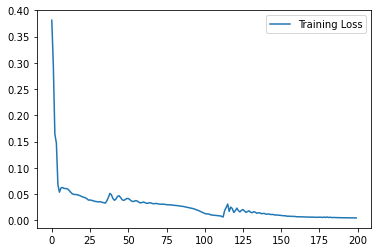

In [47]:
plt.plot(hist, label='Training Loss')
plt.legend()
plt.show()

In [48]:
y_train_pred = model(X_train_m)
y_test_pred = model(X_test_m)

y_train_pred = scaler.inverse_transform(y_train_pred.detach().numpy())
y_train = scaler.inverse_transform(y_train_m.detach().numpy())
y_test_pred = scaler.inverse_transform(y_test_pred.detach().numpy())
y_test = scaler.inverse_transform(y_test_m.detach().numpy())

trainScore = np.sqrt(mean_squared_error(y_train_m[:,0], y_train_pred[:,0]))
print('Train Score: %.2f RMSE' % (trainScore))
testScore = np.sqrt(mean_squared_error(y_test_m[:,0], y_test_pred[:,0]))
print('Test Score: %.2f RMSE' % (testScore))

Train Score: 11.51 RMSE
Test Score: 9.70 RMSE


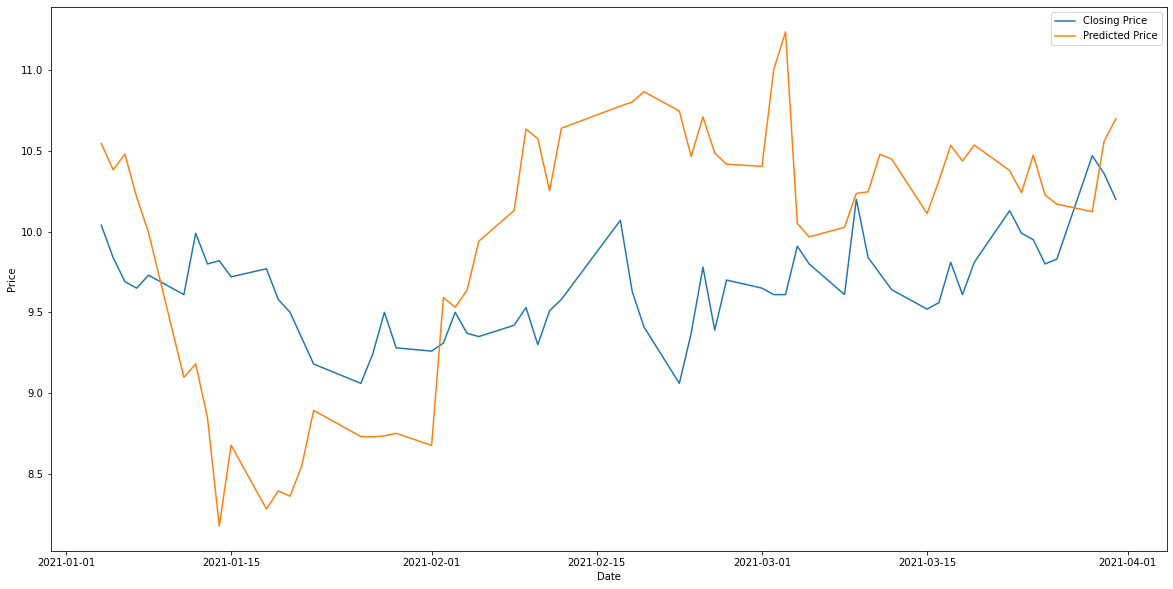

In [49]:
plt.figure(figsize=(20, 10))
plt.plot(testing_data['Date'], y_test.reshape(-1), label='Closing Price')
plt.plot(testing_data['Date'], y_test_pred.reshape(-1), label='Predicted Price')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()